# DS 2002 Final Project:

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import files

## Import Data

In [ ]:
# Set URLs to github repositories with data
LifeExpectancyURL = "https://github.com/ScotsDunn/DS2002FProject/raw/refs/heads/main/life-expectancy.csv"
EnergyConsumptionURL = "https://github.com/ScotsDunn/DS2002FProject/raw/refs/heads/main/owid-energy-data.csv"

LE_df = pd.read_csv(LifeExpectancyURL)
EC_df = pd.read_csv(EnergyConsumptionURL)

## Clean Data

In [ ]:
# Clean environmental data

# Clean life expectancy data
LE_df.rename(columns={'Year': 'year', 'Code': 'iso_code'}, inplace=True)

# Merge datasets
df = pd.merge(LE_df, EC_df, how='inner', on=['year', 'iso_code']) #Merges dataset where year and iso_code are equivalent

# Clean merged datasets
df.rename(columns={
    'Period life expectancy at birth - Sex: all - Age: 0': 'life_expectancy'
}, inplace=True)

df['gdp'] = pd.to_numeric(df['gdp'], errors='coerce')
df['life_expectancy'] = pd.to_numeric(df['life_expectancy'], errors='coerce')

df.drop(df[df['year'] < 1950].index, inplace=True)

df = df.drop_duplicates(subset=['country', 'year'], keep='first')

df = df.dropna(subset=["iso_code"])

In [ ]:
EC_df.head() #preclean

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
LE_df.head() #preclean

,Entity,iso_code,year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [ ]:
df.head() #merged preclean

,Entity,iso_code,year,life_expectancy,country,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,AFG,1950,27.7275,Afghanistan,7480464.0,9.421400e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951,27.9634,Afghanistan,7571542.0,9.692280e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952,28.4456,Afghanistan,7667534.0,1.001733e+10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953,28.9304,Afghanistan,7764549.0,1.063052e+10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954,29.2258,Afghanistan,7864289.0,1.086636e+10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sample data

cleaned_df = df[['life_expectancy', 'gdp']].dropna()

life_expectancy = cleaned_df['life_expectancy'].values
gdp = cleaned_df['gdp'].values

# Reshape gdp for scikit-learn
gdp = gdp.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(gdp, life_expectancy)

# Predict life expectancy based on gdp
predicted_life_expectancy = model.predict(gdp)

# Calculate R2 score
r2 = r2_score(life_expectancy, predicted_life_expectancy)
print(f"R2 score: {r2}")


R2 score: 0.044245226681839056


### Life Expectancy vs GDP per Capita graph - by country and year

In [ ]:
gdp_min = df['gdp'].min()
gdp_max = df['gdp'].max()
life_exp_min = df['life_expectancy'].min()
life_exp_max = df['life_expectancy'].max()

gdp_padding = (gdp_max - gdp_min) * 0.05  # 5% padding
life_exp_padding = (life_exp_max - life_exp_min) * 0.05

x_range = [gdp_min - gdp_padding, gdp_max + gdp_padding]
y_range = [life_exp_min - life_exp_padding, life_exp_max + life_exp_padding]

fig = px.scatter(
    df,
    x='gdp',
    y='life_expectancy',
    color='Entity',
    hover_name='Entity',
    animation_frame='year',
    animation_group='Entity',
    size_max=60,
    labels={
        'gdp': 'GDP per Capita (USD)',
        'life_expectancy': 'Life Expectancy at Birth (Years)'
    },
    title='Life Expectancy vs GDP per Capita by Country and Year (1950+)',
    template='plotly_white'
)

# 7. Update Axis Ranges to Fix the View Across All Frames
fig.update_xaxes(range=x_range)
fig.update_yaxes(range=y_range)

fig.update_xaxes(
    type='log',
    range=[np.log10(x_range[0]), np.log10(x_range[1])],
    title='GDP per Capita (USD, Log Scale)'
)

fig.show()


KeyboardInterrupt: 

### GDP over time by country

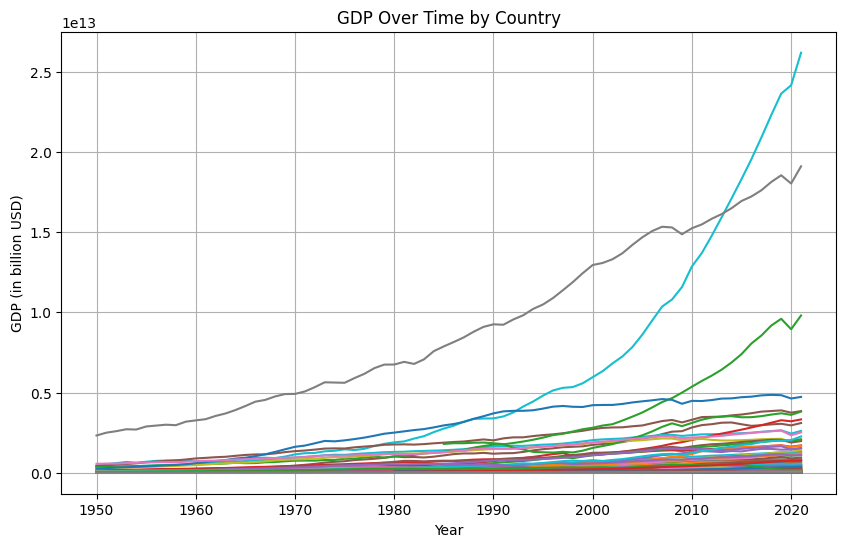

In [ ]:
plt.figure(figsize=(10, 6))

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['gdp'])

plt.title('GDP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP (in billion USD)')
plt.grid(True)

plt.show()

### Life Expectancy over time by country

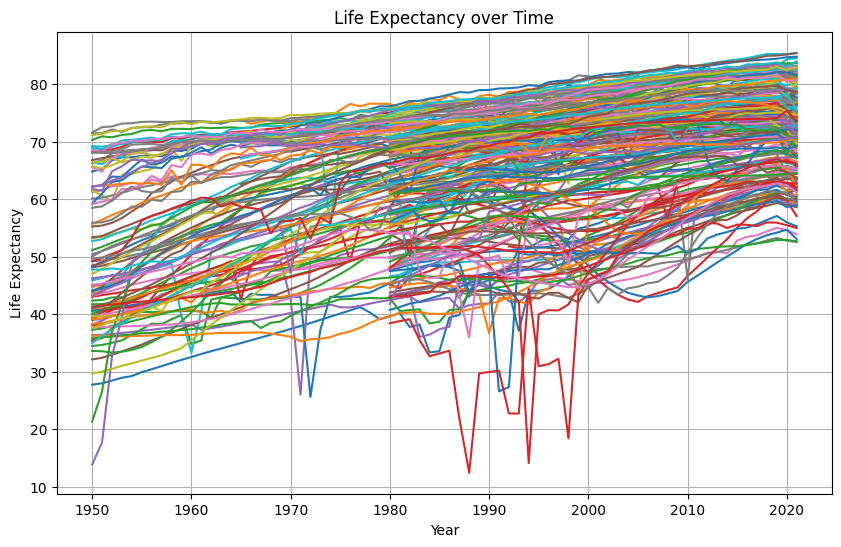

In [ ]:
plt.figure(figsize=(10, 6))

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['life_expectancy'])

plt.title('Life Expectancy over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)

plt.show()


### Top correlations between Energy-related data and life expectancy

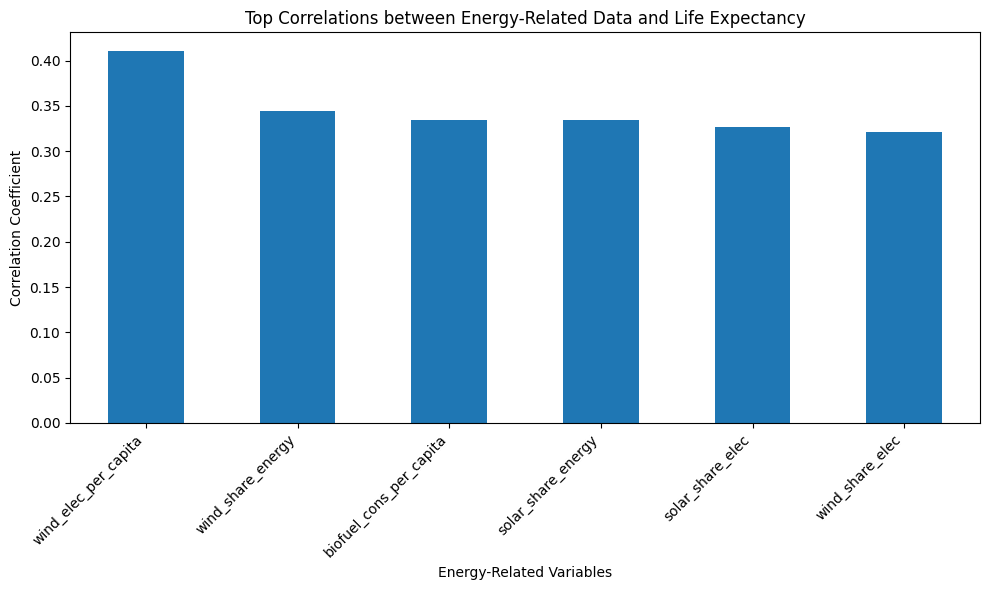

In [ ]:
energy_columns = [
    'biofuel_cons_per_capita', 'solar_share_elec', 'solar_share_energy',
    'wind_elec_per_capita', 'wind_share_elec', 'wind_share_energy'
]

filtered_data = df[['life_expectancy'] + energy_columns].dropna()
correlations = filtered_data.corr()['life_expectancy'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations[1:].plot(kind='bar')  # Exclude self-correlation
plt.title('Top Correlations between Energy-Related Data and Life Expectancy')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Energy-Related Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Life expectancy vs square root of biofuel consumption per capita

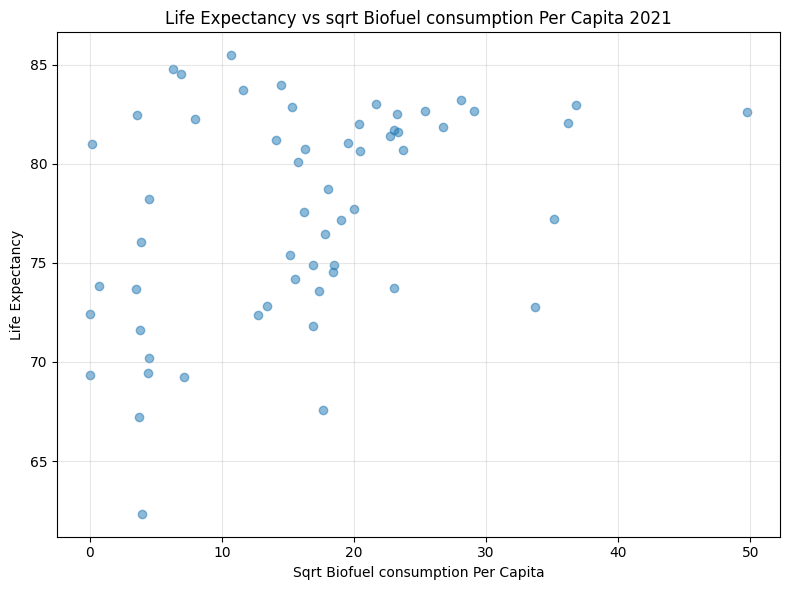

In [ ]:
subset_columns = [
    'year',
    'biofuel_cons_per_capita'
]

filtered_data = df[['life_expectancy'] + subset_columns].dropna()

filtered_data = filtered_data[filtered_data['year'] == 2021]

filtered_data['sqrt_biofuel_cons_per_capita'] = np.sqrt(filtered_data['biofuel_cons_per_capita'])

plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['sqrt_biofuel_cons_per_capita'], filtered_data['life_expectancy'], alpha=0.5)
plt.title("Life Expectancy vs sqrt Biofuel consumption Per Capita 2021")
plt.xlabel("Sqrt Biofuel consumption Per Capita")
plt.ylabel("Life Expectancy")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Post-Analysis Cleanup (to prep for storage)

In [ ]:
# Let's trim our dataset to make it easier to store in a SQL file.

# First, let's get rid of all unnecessary columns in our dataset.
df.reset_index(inplace=True)
# We will only keep a country's name, code, year, life expectancy, population, and GDP.
columns_to_keep = ['Entity', 'iso_code', 'year', 'life_expectancy', 'country', 'population', 'gdp']
trimmed_df = df[columns_to_keep]

trimmed_df.head()

,Entity,iso_code,year,life_expectancy,country,population,gdp
0,Afghanistan,AFG,1950,27.7275,Afghanistan,7480464.0,9.421400e+09
1,Afghanistan,AFG,1951,27.9634,Afghanistan,7571542.0,9.692280e+09
2,Afghanistan,AFG,1952,28.4456,Afghanistan,7667534.0,1.001733e+10
3,Afghanistan,AFG,1953,28.9304,Afghanistan,7764549.0,1.063052e+10
4,Afghanistan,AFG,1954,29.2258,Afghanistan,7864289.0,1.086636e+10


## Converting from dataframe to SQL

In [ ]:
# SQLite connection
conn = sqlite3.connect("country_metrics.db")  # Creates or connects to a SQLite database file
table_name = "countries"

# Write the DataFrame to a SQL table
trimmed_df.to_sql(table_name, conn, if_exists="replace", index=False)

# DEBUG: Check if database creation was successful.
query_result = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
print(query_result)

# Close the connection
conn.close()

            Entity iso_code  year  life_expectancy      country  population  \
0      Afghanistan      AFG  1950          27.7275  Afghanistan   7480464.0   
1      Afghanistan      AFG  1951          27.9634  Afghanistan   7571542.0   
2      Afghanistan      AFG  1952          28.4456  Afghanistan   7667534.0   
3      Afghanistan      AFG  1953          28.9304  Afghanistan   7764549.0   
4      Afghanistan      AFG  1954          29.2258  Afghanistan   7864289.0   
...            ...      ...   ...              ...          ...         ...   
11782     Zimbabwe      ZWE  2017          60.7095     Zimbabwe  14751101.0   
11783     Zimbabwe      ZWE  2018          61.4141     Zimbabwe  15052191.0   
11784     Zimbabwe      ZWE  2019          61.2925     Zimbabwe  15354606.0   
11785     Zimbabwe      ZWE  2020          61.1242     Zimbabwe  15669663.0   
11786     Zimbabwe      ZWE  2021          59.2531     Zimbabwe  15993525.0   

                gdp  
0      9.421400e+09  
1      

## Testing with SQL Queries

#### Select all values from The United States

In [ ]:
# Connect to SQLite
conn = sqlite3.connect('country_metrics.db')
c = conn.cursor()

# Select all data from the USA.
c.execute('''
SELECT * FROM countries WHERE country = 'United States'
''')

# Fetch and display the results
joined_data = c.fetchall()

print("All United States Data:\n")

# Manually adding headers to our print
headers = [description[0] for description in c.description]

# Print the headers
print(" | ".join(headers))

for row in joined_data:
    print(row)

conn.commit()
conn.close()

All United States Data:

Entity | iso_code | year | life_expectancy | country | population | gdp
('United States', 'USA', 1950, 68.0594, 'United States', 148281552.0, 2320610099200.0)
('United States', 'USA', 1951, 68.1696, 'United States', 150598448.0, 2497407877120.0)
('United States', 'USA', 1952, 68.366, 'United States', 152941728.0, 2590801395712.0)
('United States', 'USA', 1953, 68.6998, 'United States', 155451200.0, 2709832597504.0)
('United States', 'USA', 1954, 69.4892, 'United States', 158205872.0, 2691885432832.0)
('United States', 'USA', 1955, 69.5456, 'United States', 161136448.0, 2882221637632.0)
('United States', 'USA', 1956, 69.6301, 'United States', 164063408.0, 2938405650432.0)
('United States', 'USA', 1957, 69.4058, 'United States', 166949120.0, 2993553408000.0)
('United States', 'USA', 1958, 69.6606, 'United States', 170147104.0, 2963550502912.0)
('United States', 'USA', 1959, 69.8889, 'United States', 173324608.0, 3183156920320.0)
('United States', 'USA', 1960, 69.

#### Showing the global average of GDP and Life Expectancy per year

In [ ]:
# Connect to SQLite
conn = sqlite3.connect('country_metrics.db')
c = conn.cursor()

# Select
c.execute('''
SELECT year, AVG(gdp), AVG(life_expectancy) FROM countries
GROUP BY year
''')

# Fetch and display the results
joined_data = c.fetchall()

print("Worldwide Averages Per Year:\n")

# Manually adding headers to our print
headers = [description[0] for description in c.description]

# Print the headers
print(" | ".join(headers))

for row in joined_data:
    print(row)

conn.commit()
conn.close()

Worldwide Averages Per Year:

year | AVG(gdp) | AVG(life_expectancy)
(1950, 83983652093.977, 49.00991956521738)
(1951, 90072438934.8046, 49.4092695652174)
(1952, 94308663719.35632, 50.30890869565216)
(1953, 99726598981.88506, 50.95751847826088)
(1954, 102089980988.13792, 51.70136086956522)
(1955, 108645481454.16092, 52.266167391304336)
(1956, 113244007007.44827, 52.799223913043484)
(1957, 117392616132.5977, 53.247924999999974)
(1958, 119815414414.89655, 54.026698913043475)
(1959, 125805830013.7931, 54.34862934782609)
(1960, 131655013754.48276, 54.82844021739132)
(1961, 135908625577.93103, 55.4069304347826)
(1962, 143160300659.49426, 55.92165869565215)
(1963, 150865831300.4138, 56.42382826086957)
(1964, 161208584258.94254, 56.967458695652184)
(1965, 158398533481.87234, 58.2902891089109)
(1966, 166649836975.65958, 58.77129207920789)
(1967, 172994330510.97873, 59.16001584158414)
(1968, 182447141844.0851, 59.46729603960395)
(1969, 193581239982.97873, 59.77153564356436)
(1970, 201857624030.

#### Find the country with the longest life expectancy

In [ ]:
# Connect to SQLite
conn = sqlite3.connect('country_metrics.db')
c = conn.cursor()

# Select the country with the largest average life expectancy
c.execute('''
SELECT country, AVG(life_expectancy) AS avg_life_expectancy
FROM countries
GROUP BY country
ORDER BY avg_life_expectancy DESC
LIMIT 1
''')

# Fetch and display the results
joined_data = c.fetchall()

print("Country with Largest Life Expectancy:\n")

# Manually adding headers to our print
headers = [description[0] for description in c.description]

# Print the headers
print(" | ".join(headers))

for row in joined_data:
    print(row)

conn.commit()
conn.close()

In [ ]:
trimmed_df.to_csv('country_metrics.csv')
files.download('country_metrics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>